In [1]:
import pandas as pd
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

import requests
from bs4 import BeautifulSoup
from transformers import pipeline
import pandas as pd

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
dler = nltk.downloader.Downloader()

dler._update_index()
dler.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_dat

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Dow

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\nsimh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\U

True

In [4]:
# data.drop_duplicates()


### Data cleaning :

## Summarisation

### Preprocesssing of sentances:m

### Go to KNN / KMeans / DBScan------------------
###### Nothing else

### Adding 'court' and 'act' in stopword does not consider tenant and rent in topwords
### Sometimes, for the given examples, the algorithm is assigning wrong clusters during inference. This is because the other cluster might have more weightage for the top keyword like 'court'. This is happening because the other cluster has more data points whereas the target cluster has very less as compared to the other one (Check the number of times top words is present in each of them)
### extra_stop_words = ['appeal','petition','civil','appellant','judgment'] and num_clusters=10
### If we add 'court' to stop words, it is not considering 'tenant' and 'rent' as top words

Try with different max_features

Things we can play around with  - max_features for vectorizing, different vectorization methods and different grouping methods

Find the right k for K-means clustering

In [209]:
#Hyperparamater max_features caps the dimentsion
#for 3680 datasamples - the dim of each sample is 9961
#as no of samples increases for training, the dim of each also increases

#### Observation : Eucledian Distance simalarity is not upto the mark haha. Cosine Sim is really good

# ________________KNN______________________________________________

In [210]:
new_doc = "The tenant fought with him" #KMeans> KNN 

In [211]:
new_doc = "The industrial men harrased the labour so an act was passed" 
new_doc = "chain snatching of women "
new_doc = "He did not pay tax"
new_doc = "The man was shot dead by the police"
new_doc = "He committed suicide by drinking poison"
new_doc = "The landlord sued the tenant for not paying rent on time"
new_doc = "He was arrested on charges of corruption"
new_doc = "Violence erupted during the celebration of festival" #KNN > KMenas
new_doc = "He was arrested on charges of corruption"


In [212]:
new_doc = "He did not pay tax" #Shows the difference in differnt KNN approaches
new_doc = "He and his brother are having dispute over the land they own with the workmen and labours" 
new_doc = "He did not pay tax"
new_doc = "He is bribing during election"

In [213]:
class KNN_Law:
    def __init__(self,data,context="Summary"):
        '''To vectorise the data.
        Context : 1) "Summary" (defualt) - Algorithm uses the summaries 
                  2) "PreProcessed" - Algorithn uses Pre preocessed summaries'''
        self.summaries = data[context].tolist()
        self.complete_data = data
        self.vectorizer = TfidfVectorizer(stop_words='english')
        self.X = self.vectorizer.fit_transform(self.summaries)

    def findNN(self,no_of_neighbours, new_document,context="Summary" , what="URL"):
        '''Prints the URL of top K nearest neighbours.
        --------------------------
        Paramaters:
        Context : 1) "Summary" (defualt) - Algorithm uses the summaries 
                  2) "PreProcessed" - Algorithn uses Pre preocessed summaries
        
        What    : 1)"URL" : (default) Prints the URL for the document
                  2)"Summary" : Prints the Summary/Pre Processed Summary based on the context
        '''
        given_summary=new_document
        k = no_of_neighbours
        
        if(context!="Summary"):
            given_summary = preprocess_summary(new_document)
            print("LOG : Summary PreProcessed")
            
        given_summary_vectorised = self.vectorizer.transform([given_summary])
        nn = NearestNeighbors(n_neighbors=k, metric='euclidean')
        nn.fit(self.X)
        
        distances, indices = nn.kneighbors(given_summary_vectorised) #indices has the serial no (Not case no)

        print(f"The {k} nearest summaries to '{given_summary}' are:")
        if(what=="URL"):
            for i in indices[0]:
                print(f'https://indiankanoon.org/doc/{self.complete_data.iloc[i]["Case Number"]}')
        else:
            for i in indices[0]:
                print("------------------------")
                print(self.complete_data.iloc[i][context])

In [214]:
knnObj_Summary = KNN_Law(new_data,context="Summary")
knnObj_PreProSum = KNN_Law(new_data,context="PreProcessedSummary")

In [215]:
new_doc = "He did not pay tax" #Shows the difference in differnt KNN approaches
new_doc = "The tenant fought with him" #KMeans> KNN 

In [216]:
knnObj_PreProSum.findNN(no_of_neighbours=2,new_document=new_doc,context="PreProcessedSummary",what="URL")

LOG : Summary PreProcessed
The 2 nearest summaries to 'tenant fought' are:
https://indiankanoon.org/doc/131585
https://indiankanoon.org/doc/1106648


In [217]:
knnObj_Summary.findNN(no_of_neighbours=2,new_document=new_doc,context="Summary",what="URL")

The 2 nearest summaries to 'The tenant fought with him' are:
https://indiankanoon.org/doc/131585
https://indiankanoon.org/doc/1106648


In [218]:
knnObj_PreProSum.findNN(no_of_neighbours=2,new_document=new_doc,context="PreProcessedSummary",what="PreProcessedSummary")

LOG : Summary PreProcessed
The 2 nearest summaries to 'tenant fought' are:
------------------------
directed dismissal high allahabad election filed fought election jan sangh party ticket returned candidate fought congress party ticket election filed three ground publication two pamphlet ex contained false statement relating personal character conduct within meaning representation people act
------------------------
heard tenant delhi tenant evicted delhi ajmer rent control act landlord ordered pay tenant r arrears rent high reversed earlier order ordered eviction tenant


In [219]:
knnObj_Summary.findNN(no_of_neighbours=2,new_document=new_doc,context="Summary",what="Summary")

The 2 nearest summaries to 'The tenant fought with him' are:
------------------------
 Appeal was directed against the dismissal by the High Court of Allahabad of the election petition filed by the appellant . The appellant fought the election on the Jan Sangh party ticket, while the returned candidate fought it on the Congress party ticket . The election petition was filed on three grounds : (1) the publication of two pamphlets (Ex P-8 and P-9) contained false statements relating to his personal character and conduct within the meaning of the Representation of the People Act, 1951 .
------------------------
 Civil Appeal No. 389 of 1966 was heard in an appeal by a tenant in Delhi . The tenant had been evicted under the Delhi and Ajmer Rent Control Act of 1952 . The landlord was ordered to pay the tenant Rs. 145 as arrears of rent . The High Court reversed its earlier order and ordered eviction of the tenant .


#### OBSERVATION 1 : KNN Performance is differnet on Preprocess Summaries and Summaries ( Only Summaries is performing better) Ex : "He did not pay tax"

#### OBSERVATION 2 : Based on the example both perform the same with relative order change

#### OBSERVATION 3 : 

# KNN_Pipeline  :Give the URL of Doc and get what you want

In [220]:
class KNN_Pipeline_law(KNN_Law):
    def __init__(self,context):
        KNN_Law.__init__(self,new_data,context)
    def getSomething(self,doc_url,what,context,no_of_neighbours=5):
        new_doc = summarize_legal_document(doc_url)
        self.findNN(no_of_neighbours=no_of_neighbours,new_document=new_doc,context=context,what=what)    
        

In [171]:
url = "https://indiankanoon.org/doc/134461"

In [172]:
knn_pipe = KNN_Pipeline_law(context="Summary")
knn_pipe.getSomething(doc_url=url, what="URL", context="Summary")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


The 5 nearest summaries to ' The Court of Small Causes, Ahmedabad, ordered the appellants to pay the rent and municipal taxes for 1964-65 . The appellants had also agreed to pay municipal taxes and electricity charges . The respondent obtained an order for the issue of a distress warrant for recovery of the amount due as municipal taxes . Distress was levied, and file order was confirmed .' are:
https://indiankanoon.org/doc/134461
https://indiankanoon.org/doc/321652
https://indiankanoon.org/doc/1417510
https://indiankanoon.org/doc/707177
https://indiankanoon.org/doc/118959948


In [173]:
knn_pipe.getSomething(doc_url=url, what="Summary", context="Summary",no_of_neighbours=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


The 2 nearest summaries to ' The Court of Small Causes, Ahmedabad, ordered the appellants to pay the rent and municipal taxes for 1964-65 . The appellants had also agreed to pay municipal taxes and electricity charges . The respondent obtained an order for the issue of a distress warrant for recovery of the amount due as municipal taxes . Distress was levied, and file order was confirmed .' are:
------------------------
 The Court of Small Causes, Ahmedabad, ordered the appellants to pay the rent and municipal taxes for 1964-65 . The appellants had also agreed to pay municipal taxes and electricity charges . The respondent obtained an order for the issue of a distress warrant for recovery of the amount due as municipal taxes . Distress was levied, and file order was confirmed .
------------------------
 Civil Appeal No. 598 of 1962 is an appeal from the High Court of. The Municipal Committee of Amravati against a decision of the High. Court of the Municipal. Committee . The Municipal C

In [174]:
knn_pipe = KNN_Pipeline_law("PreProcessedSummary")

In [175]:
knn_pipe.getSomething(doc_url=url, what="URL", context="PreProcessedSummary",no_of_neighbours=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


LOG : Summary PreProcessed
The 2 nearest summaries to 'small cause ahmedabad ordered appellant pay rent municipal tax appellant also agreed pay municipal tax electricity charge respondent obtained order issue distress warrant recovery amount due municipal tax distress levied file order confirmed' are:
https://indiankanoon.org/doc/134461
https://indiankanoon.org/doc/321652


In [176]:
knn_pipe.getSomething(doc_url=url, what="PreProcessedSummary", context="PreProcessedSummary",no_of_neighbours=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


LOG : Summary PreProcessed
The 2 nearest summaries to 'small cause ahmedabad ordered appellant pay rent municipal tax appellant also agreed pay municipal tax electricity charge respondent obtained order issue distress warrant recovery amount due municipal tax distress levied file order confirmed' are:
------------------------
small cause ahmedabad ordered appellant pay rent municipal tax appellant also agreed pay municipal tax electricity charge respondent obtained order issue distress warrant recovery amount due municipal tax distress levied file order confirmed
------------------------
municipal committee amravati decision municipal committee municipal council established berar municipality act committee may time time impose tax might imposed municipal committee may time impose tax act


# __________K-Means____________

In [30]:
new_data

,Case Number,Summary,PreProcessedSummary
0,1249923,An appeal by special leave against the judgme...,special leave order punjab dated may ferozepur...
1,68170353,Drug and Magic Remedies (Objectionable Advert...,drug magic remedy objectionable advertisement ...
2,779491,Criminal Appeal No. 204 of the Calcutta High ...,criminal calcutta special leave order dated ju...
3,591481,"Petition Nos. 81, 62, 63 & 3 of 1959 was file...",no filed art constitution india petitioner all...
4,1034384,"Criminal Appeals Nos. 36-D, 37-D and 52-D of ...",criminal appeal no quashed punjab punjab bhana...
...,...,...,...
8814,1057848,The appellant was working as Officiating Secr...,working officiating secretary respondent munic...
8815,550254,The appellants and their deceased father S. B...,appellant deceased father bhagat singh saluja ...
8816,1073551,The disputed land belonged originally to one ...,disputed land belonged originally one anwar al...
8817,998337,Jaimal was the owner of the suit properties ....,jaimal owner suit property died leaving behind...


In [221]:
class KMeans_lawRecc:

    def __init__(self ,data, no_of_clusters=10):
        
        self.NO_OF_CLUSTERS=no_of_clusters
        self.kmeans=KMeans(self.NO_OF_CLUSTERS,random_state=42)
        self.complete_data = data
        self.target_cluster = -1
        self.target_doc_vector={}
        self.target_doc=""
        self.vectorized_summaries={}
        self.top_words_per_cluster = []
        #Vectorisation on Preprocessed data:
        preprocessed_summaries = self.complete_data['PreProcessedSummary'].tolist()
        self.vectorizer = TfidfVectorizer()
        self.vectorized_summaries = self.vectorizer.fit_transform(preprocessed_summaries)

        #Fitting Model
        cluster_labels = self.kmeans.fit_predict(self.vectorized_summaries)
        
        
        #Updating data
        self.complete_data['cluster']=cluster_labels
        
        

        
    def predict_cluster(self,new_document):
        
        self.target_doc=new_document

        new_doc_preprosum = preprocess_summary(new_document)
        
        self.target_doc_vector = self.vectorizer.transform([new_doc_preprosum])
        self.target_cluster = self.kmeans.predict( self.target_doc_vector)
        print(" TARGET CLUSTER : ",self.target_cluster)
   
        return self.vectorized_summaries
        
    def getTopKWords(self,K=10): #Gets the top K words in each cluster
        ''' Provide K as the Top words you want from the cluster'''
        
        cluster_labels = self.complete_data['cluster']
        preprocessed_summaries = self.complete_data['PreProcessedSummary'].tolist()
        all_stop_words= stopwords.words('english')+extra_stop_words
        
        # Get the indices of the documents belonging to each cluster
        cluster_indices = [np.where(cluster_labels == i)[0] for i in range(self.NO_OF_CLUSTERS)]
        # Loop over each cluster
        for i, indices in enumerate(cluster_indices):
            # Get the documents belonging to the current cluster
            cluster_documents = [preprocessed_summaries[index] for index in indices]
            #cluster_documents = [summaries[index] for index in indices]


            # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
            vectorizer = TfidfVectorizer(stop_words=all_stop_words)
            tfidf_matrix = vectorizer.fit_transform(cluster_documents)

            # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
            word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
            sorted_word_indices = np.argsort(word_scores)[::-1]

            # Print the top k words for the current cluster
            print(f"\nTop {K} words for Cluster {i}:")
            feature_names = np.array(vectorizer.get_feature_names_out())
            self.top_words_per_cluster.append([])
            for j in range(K):
                print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")
                self.top_words_per_cluster[i].append(feature_names[sorted_word_indices[j]])
                
    def getTopKWordCloud(self):
        '''Based on getTopKWords() - Provides a visual look'''
        num_clusters = self.NO_OF_CLUSTERS
        top_words_per_cluster = km1.top_words_per_cluster
       
        for i in range(num_clusters):
            wordcloud = WordCloud(min_font_size=4,background_color='white', width=800, height=400).generate(' '.join(top_words_per_cluster[i]))
            plt.figure(figsize=(8, 4))
            plt.imshow(wordcloud)
            plt.axis('off')
            plt.tight_layout(pad=0)
            plt.show()
            print("--------------------------")
            
    def getCompleteData(self):
        return self.complete_data
    
    def getTargetCluster(self):
        return self.target_cluster
    
    def getSummaryOfCluster(self,cluster_no,Context="Summary"):
        '''Prints the Requited Content for the given cluster
            Context :
                1) "Summary" - For Summary of the document (By default)
                2)  "PreProcessedSummary" - To see the prepreocessed summary of the data

            
        '''
        for sum in self.complete_data[self.complete_data['cluster']==cluster_no][Context]:
            print("-----------")
            print(sum)
            
    def getTopXDoc(self,no_of_doc,distance_measure="cos",what="URL"):
        '''To get the Top X Documents similar to the test document 
        ------------------------------------------------------------
        Arguments : 
        Distance Metric-
            "cos" :Cosine Simalarity
            "euc" :Eucledian Distance
        By default considers Cosine Simalarity
        
        What : 
                1) "URL": (default) Prints the URL of the Closest document
                2) "Summary" : Prints the Summary of the Closest document
            '''
        # Get the cluster label for the new document
        
        vectorized_summaries = self.vectorized_summaries
        new_document_vectorized=self.target_doc_vector
        new_doc_cluster_label = self.target_cluster[0]
        cluster_labels = self.complete_data['cluster']

        # Get the indices of all data points that belong to the same cluster as the new document
        cluster_indices = np.where(cluster_labels == new_doc_cluster_label)[0]
        # Select the corresponding data points
        cluster_data_points = vectorized_summaries[cluster_indices]
        
        if distance_measure=="euc":
            similarities = euclidean_distances(new_document_vectorized, cluster_data_points)
        else:
            similarities = cosine_similarity(new_document_vectorized, cluster_data_points)

        # Get the indices of the documents sorted by similarity
        sorted_indices = np.argsort(similarities)[0][::-1]

        top_indices = sorted_indices[:no_of_doc+1]

        # Get the indices of the documents in the original dataset
        document_indices = cluster_indices[top_indices]

        # Print the document numbers that are closest
        print(f'Top {no_of_doc} nearest documents in cluster {new_doc_cluster_label }:')
        if(what=="Summary"):
            for document_index in document_indices:
                print("---------------------")
                print((self.complete_data.iloc[document_index]['Summary']))
        else:
            for document_index in document_indices:
                print("https://indiankanoon.org/doc/"+str(self.complete_data.iloc[document_index]['Case Number']))
    def getSizeOfEachCluster(self):
        for i in range(self.NO_OF_CLUSTERS):
            print(f'Cluster No : {i} | Size : ',len(self.complete_data[self.complete_data['cluster']==i]))

In [222]:
km1 = KMeans_lawRecc(data= new_data, no_of_clusters= 10)

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [223]:
# new_doc = "He and his brother are having dispute over the land they own with the workmen and labours"
# new_doc = " The impugned Acts infringe the fundamental rights under Art. (1) of the petitioners who are butchers, gut merchants, curers and cattle dealers to carry on their respective trades . They also contravene the religious practice of the Petitioners' community to sacrifice cows, cattle and sheep and goats  "
# new_doc = "He was arrested on charges of corruption"
# new_doc= "Appeal from the judgment and order dated October 7, 1953, in the Orissa High Court in O.J.C. No. 37 of  1952 . The relevant appeal was delivered by BHAGWATI  J.-This appeal arises out of a petition filed by the respondent in the High Court of Orissa against tenants of his private lands . The lands comprised in the present proceedings were declared to be the private properties of the respondent "


In [224]:
new_doc = "He did not pay tax" # KMeans and KNN have correct but differnet results
new_doc = "He and his brother are having dispute over the land they own with the workmen and labours"
new_doc = "The landlord sued the tenant for not paying rent on time"
new_doc = "Violence erupted during the celebration of festival" # Differtn from KNN
new_doc = "The tenant fought with him" #Better than KNN | KNN mapped the fight keyword but KMeans mapped it to the tenant cluster and found the nearest documents
new_doc = "The industrial men harrased the labour so an act was passed"
new_doc=" He was sentenced for lifetime imprisonment for murder"


In [225]:
km1.getSizeOfEachCluster()

Cluster No : 0 | Size :  3424
Cluster No : 1 | Size :  233
Cluster No : 2 | Size :  549
Cluster No : 3 | Size :  659
Cluster No : 4 | Size :  410
Cluster No : 5 | Size :  433
Cluster No : 6 | Size :  733
Cluster No : 7 | Size :  1058
Cluster No : 8 | Size :  551
Cluster No : 9 | Size :  769


In [226]:
km1.getTopKWords(K=10)


Top 10 words for Cluster 0:
high (128.21)
act (80.85)
respondent (79.61)
order (67.77)
case (67.67)
state (64.49)
company (57.47)
delivered (49.65)
two (45.54)
dated (45.37)

Top 10 words for Cluster 1:
election (23.74)
high (15.05)
respondent (13.13)
candidate (10.19)
constituency (9.69)
vote (9.25)
declared (9.23)
assembly (8.78)
act (8.55)
order (7.77)

Top 10 words for Cluster 2:
petitioner (32.33)
order (28.69)
act (28.10)
constitution (27.24)
detention (25.57)
india (25.52)
article (21.72)
art (19.92)
right (19.21)
writ (18.84)

Top 10 words for Cluster 3:
suit (40.47)
high (36.67)
decree (36.33)
defendant (35.50)
plaintiff (30.63)
property (26.79)
dated (23.55)
respondent (21.37)
filed (19.51)
first (18.41)

Top 10 words for Cluster 4:
industrial (25.22)
tribunal (24.91)
workman (20.58)
dispute (20.51)
award (18.27)
special (15.99)
leave (15.95)
labour (14.38)
respondent (13.72)
act (13.29)

Top 10 words for Cluster 5:
high (30.08)
order (22.86)
dated (22.66)
delivered (18.87)


In [236]:
new_doc = "The landlord sued the tenant for not paying rent on time"
new_doc = "He did not pay tax" # KMeans and KNN have correct but differnet results
new_doc = "The tenant fought with him" #Better than KNN | KNN mapped the fight keyword but KMeans mapped it to the tenant cluster and found the nearest documents


In [237]:
km1.predict_cluster(new_doc)

 TARGET CLUSTER :  [8]


<8819x17033 sparse matrix of type '<class 'numpy.float64'>'
	with 207278 stored elements in Compressed Sparse Row format>

In [238]:
km1.getTopXDoc(no_of_doc=5, distance_measure='cos', what="URL")

Top 5 nearest documents in cluster 8:
https://indiankanoon.org/doc/1106648
https://indiankanoon.org/doc/769101
https://indiankanoon.org/doc/423593
https://indiankanoon.org/doc/1916007
https://indiankanoon.org/doc/342463
https://indiankanoon.org/doc/463058


In [239]:
km1.getTopXDoc(no_of_doc=5, distance_measure='euc', what="URL")

Top 5 nearest documents in cluster 8:
https://indiankanoon.org/doc/1773632
https://indiankanoon.org/doc/963666
https://indiankanoon.org/doc/1438487
https://indiankanoon.org/doc/1724646
https://indiankanoon.org/doc/869190
https://indiankanoon.org/doc/201568


In [240]:
new_doc = "The tenant fought with him" #Better than KNN | KNN mapped the fight keyword but KMeans mapped it to the tenant cluster and found the nearest documents
km1.getTopXDoc(no_of_doc=2, distance_measure='cos', what="Summary")

Top 2 nearest documents in cluster 8:
---------------------
 Civil Appeal No. 389 of 1966 was heard in an appeal by a tenant in Delhi . The tenant had been evicted under the Delhi and Ajmer Rent Control Act of 1952 . The landlord was ordered to pay the tenant Rs. 145 as arrears of rent . The High Court reversed its earlier order and ordered eviction of the tenant .
---------------------
 The Bombay High Court granted an appeal against eviction of a tenant in a house in Sholapur, Maharashtra . The tenant had failed to pay the rent on the 20th of each of the years  1951-52 and 1953-54 . The landlords had filed a .suit for recovery of the rent and the tenant had . paid the tenant after his appeal against the decree passed against him was disposed of on June 8, 1956 . The landlord received the rent in April 1952-53 . The appeal was dismissed on the ground that the tenant paid up the rent due by him and there being no arrears at the .time of the application the appellants were,
------------

In [241]:
km1.getSizeOfEachCluster()

Cluster No : 0 | Size :  3424
Cluster No : 1 | Size :  233
Cluster No : 2 | Size :  549
Cluster No : 3 | Size :  659
Cluster No : 4 | Size :  410
Cluster No : 5 | Size :  433
Cluster No : 6 | Size :  733
Cluster No : 7 | Size :  1058
Cluster No : 8 | Size :  551
Cluster No : 9 | Size :  769


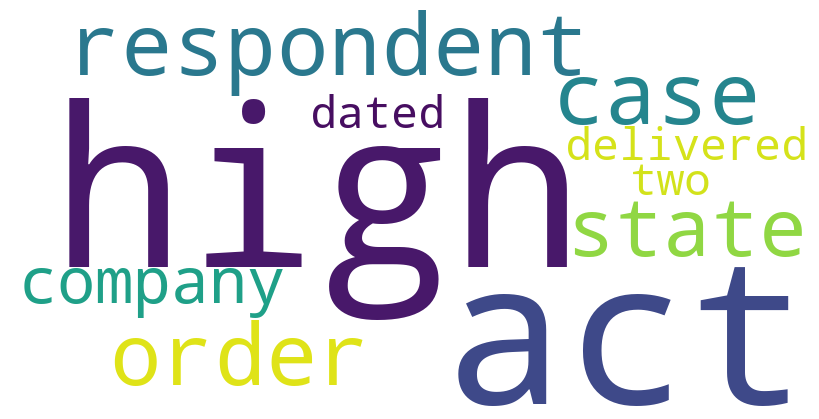

--------------------------


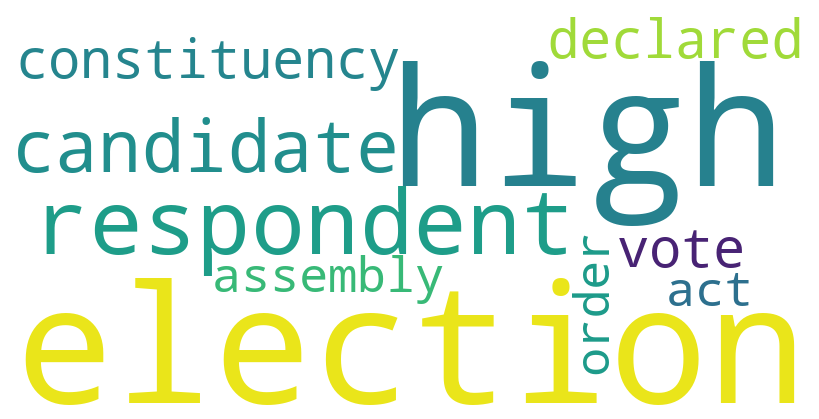

--------------------------


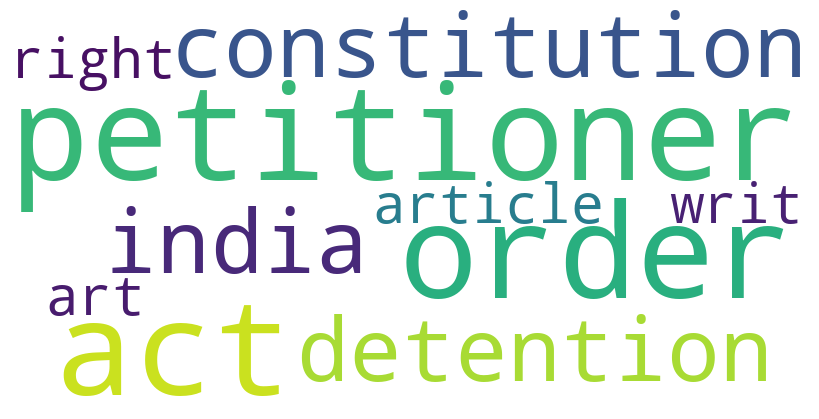

--------------------------


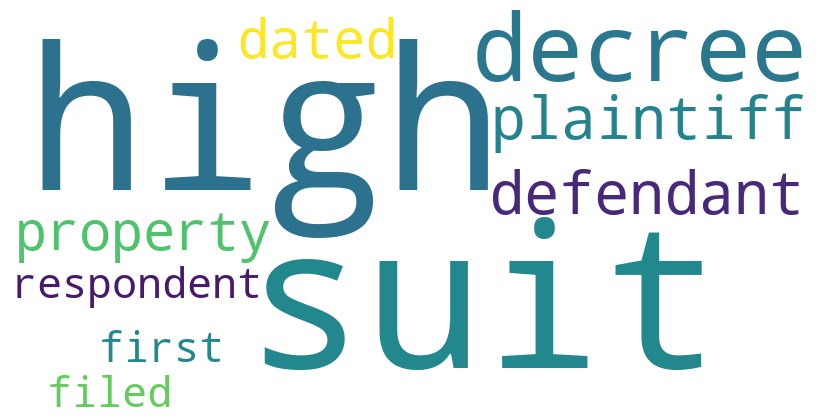

--------------------------


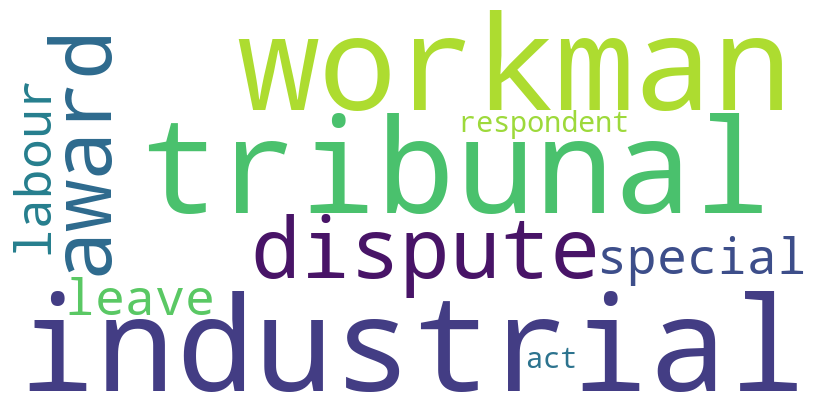

--------------------------


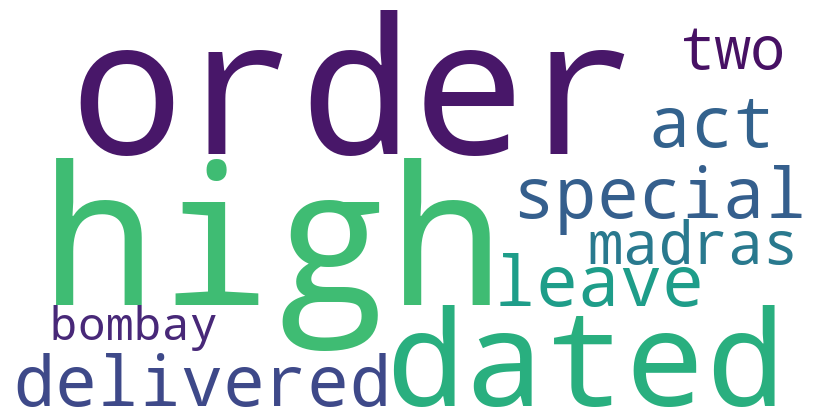

--------------------------


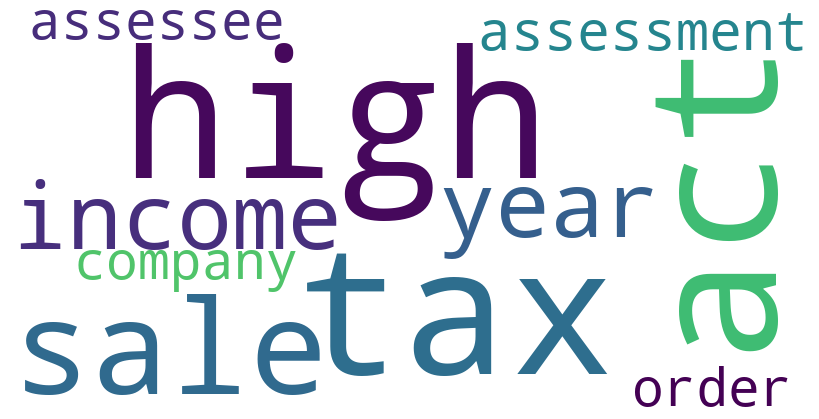

--------------------------


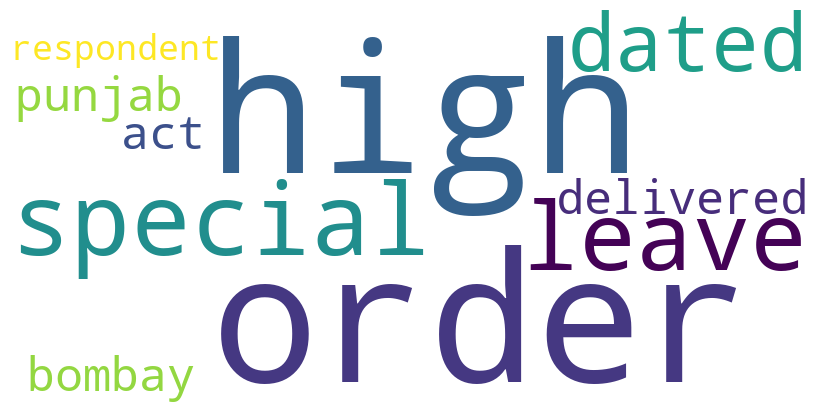

--------------------------


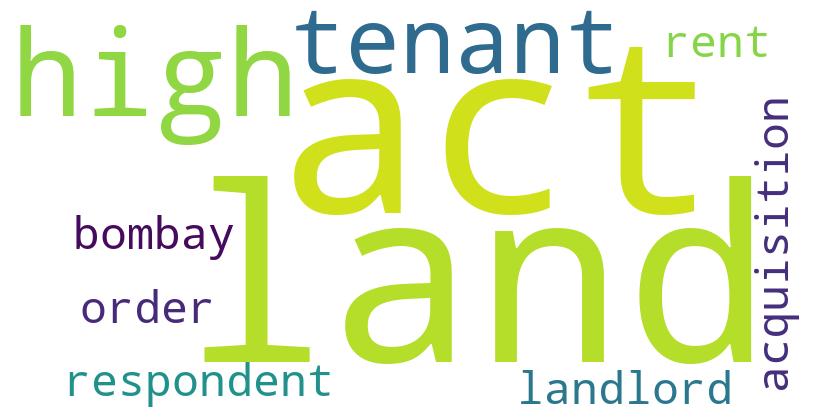

--------------------------


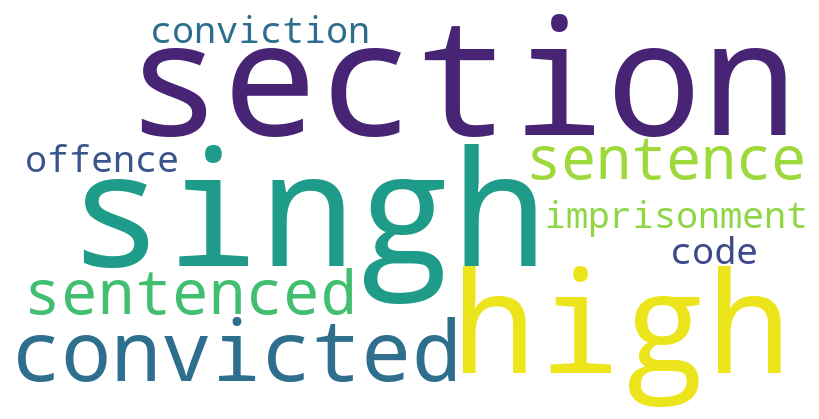

--------------------------


In [235]:
km1.getTopKWordCloud()

#### OBSERVATION : new_doc = "The tenant fought with him" Better than KNN | KNN mapped the fight keyword but KMeans mapped it to the tenant cluster and found the nearest documents


# KMeans PIPELINE : Give the URL of Doc and get what you want

In [94]:
class KMeans_Pipeline_Law(KMeans_lawRecc):
    def __init__(self):
        KMeans_lawRecc.__init__(self,data=new_data,no_of_clusters=10)

    def summarize_legal_document(self,url):
        # Retrieve the HTML content of the legal document
        response = requests.get(url)
        html_content = response.content
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract the main text content of the legal document
        main_content = soup.find("div", {"class": "judgments"})
        if main_content is None:
            return "Error: Could not find main content"
        paragraphs = main_content.find_all('p')
        text_content = ' '.join([p.text for p in paragraphs])
        if not text_content:
            return "Error: Could not extract text content"
        document_length = len(text_content)
        if document_length < 1000:
            max_length = 100
        elif document_length < 2000:
            max_length = 150
        elif document_length < 3000:
            max_length = 200
        else:
            max_length = 250
        # Use the Hugging Face Summarization pipeline to generate a summary
        summarization_pipeline = pipeline("summarization")
        try:
            summary = summarization_pipeline(text_content, max_length=max_length, min_length=30, do_sample=False, truncation=True)
        except ValueError as e:
            return f"Error: {e}"

        # Return the summary as a string
        return summary[0]['summary_text']
    
    def getSomethingSimilar(self,new_doc_url,what,no_of_doc=5):
        '''To get the Top X Documents similar to the test document 
        ------------------------------------------------------------
        Arguments : 
        
        no_of_doc : No of similar documents required. ( defualt = 5)
                     
        what : 
                1) "URL": (default) Prints the URL of the Closest document
                2) "Summary" : Prints the Summary of the Closest document
        '''
        new_doc_summary = self.summarize_legal_document(new_doc_url)
        self.predict_cluster(new_doc_summary)
        self.getTopXDoc(no_of_doc,what=what)
        
    

In [95]:
kmeansPip = KMeans_Pipeline_Law()

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [177]:
url = "https://indiankanoon.org/doc/1438487"

In [178]:
kmeansPip.getSomethingSimilar(url,no_of_doc=5,what="URL")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 TARGET CLUSTER :  [4]
Top 5 nearest documents in cluster 4:
https://indiankanoon.org/doc/1559195
https://indiankanoon.org/doc/34678562
https://indiankanoon.org/doc/78330
https://indiankanoon.org/doc/832624
https://indiankanoon.org/doc/929126
https://indiankanoon.org/doc/225066


In [179]:
kmeansPip.getSomethingSimilar(url,no_of_doc=5,what="Summary")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


 TARGET CLUSTER :  [4]
Top 5 nearest documents in cluster 4:
---------------------
 Civil Appeal No. 2293 of 1968 . Civil Appeal was dismissed by the Appellate Tribunal . Appeal was an appeal by special leave from the Kerala High Court in a reference made under the Gift Tax Act, 1958 .
---------------------
 Civil Appeal No. 2293 of 1968 . Civil Appeal was dismissed by the Appellate Tribunal . Appeal was an appeal by special leave from the Kerala High Court in a reference made under the Gift Tax Act, 1958 .
---------------------
 The question is whether the act of the assessee can be considered as a "gift" as defined in the Gift-tax Act . The court makes no order as to costs in this reference .
---------------------
 The Board of Revenue challenges the answer given by the High Court of Allahabad in a reference under the Indian Stamp Act, 1899 . This is an appeal by special leave from the Allahabad High Court in Civil  Miscel-laneous Reference No. 213 of 1955 .
---------------------
 Th

In [98]:
kmeansPip.getTopKWords()


Top 10 words for Cluster 0:
company (31.67)
act (16.35)
limited (13.12)
share (11.43)
order (11.38)
year (10.04)
indian (9.80)
dated (9.50)
respondent (9.49)
india (9.20)

Top 10 words for Cluster 1:
singh (46.31)
section (43.01)
convicted (32.19)
sentenced (30.97)
sentence (28.61)
imprisonment (28.01)
code (26.73)
conviction (26.40)
offence (26.12)
accused (26.04)

Top 10 words for Cluster 2:
order (53.69)
special (49.48)
leave (47.55)
dated (44.09)
delivered (32.07)
bombay (30.59)
punjab (30.54)
act (29.76)
respondent (27.91)
criminal (26.86)

Top 10 words for Cluster 3:
petitioner (33.10)
order (29.97)
constitution (28.94)
act (28.40)
india (26.61)
detention (25.86)
article (23.51)
art (21.42)
writ (20.25)
right (19.71)

Top 10 words for Cluster 4:
act (98.42)
respondent (92.59)
order (77.23)
case (71.95)
state (71.47)
land (70.74)
delivered (56.81)
dated (53.82)
bombay (51.03)
filed (49.16)

Top 10 words for Cluster 5:
suit (42.00)
decree (37.27)
defendant (36.49)
plaintiff (32.15

# ________________DBScan_______________

In [136]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


summaries = new_data['PreProcessedSummary'].tolist()
# create a TfidfVectorizer object to convert summaries into feature vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(summaries)

dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(X)

new_doc_summ = vectorizer.transform([new_doc])
new_doc_summ


<1x16864 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# list of documents to be clustered
documents = new_data2['PreProcessedSummary'].tolist()
documents = new_data2['Summary'].tolist()


# create a TfidfVectorizer object to convert documents into feature vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# create a DBSCAN object and fit it to the data
dbscan = DBSCAN(eps=0.74, min_samples=5, metric='cosine')
dbscan.fit(X)

# print the cluster labels for each document
# for i, label in enumerate(dbscan.labels_):
#     print(f"Document {i}: Cluster {label}")


DBSCAN(eps=0.74, metric='cosine')

In [262]:
new_data2['clusterDB'] = dbscan.labels_
new_data2['clusterDB'].nunique()

23

In [263]:
new_data2['clusterDB'].value_counts()

 0     4359
-1     4335
 14       9
 1        9
 11       9
 17       9
 19       8
 4        8
 3        6
 2        6
 15       6
 13       6
 20       6
 10       5
 5        5
 21       5
 16       5
 8        4
 6        4
 9        4
 18       4
 12       4
 7        3
Name: clusterDB, dtype: int64

In [264]:
cluster_labels = new_data2['clusterDB']
preprocessed_summaries = documents
all_stop_words= stopwords.words('english')+extra_stop_words
cluster_list = new_data2['clusterDB'].value_counts().index
# Get the indices of the documents belonging to each cluster
cluster_indices = [np.where(cluster_labels == i)[0] for i in cluster_list]
# Loop over each cluster
for i, indices in enumerate(cluster_indices):
    # Get the documents belonging to the current cluster
    cluster_documents = [preprocessed_summaries[index] for index in indices]
    #cluster_documents = [summaries[index] for index in indices]


    # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    tfidf_matrix = vectorizer.fit_transform(cluster_documents)

    # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
    word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    sorted_word_indices = np.argsort(word_scores)[::-1]

    # Print the top 10 words for the current cluster
    print(f"\nTop 10 words for Cluster {i}:")
    feature_names = np.array(vectorizer.get_feature_names_out())
    for j in range(10):
        print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")


Top 10 words for Cluster 0:
high (186.53)
act (128.99)
tax (122.52)
order (118.63)
income (100.94)
special (96.66)
dated (92.76)
leave (92.02)
appeals (83.13)
delivered (81.00)

Top 10 words for Cluster 1:
high (147.58)
order (86.61)
act (79.72)
respondent (75.48)
dated (73.81)
special (70.34)
leave (67.43)
case (66.20)
state (65.92)
rs (64.97)

Top 10 words for Cluster 2:
displaced (1.19)
act (0.75)
west (0.74)
compensation (0.72)
rule (0.72)
rules (0.70)
persons (0.69)
pakistan (0.69)
rehabilitation (0.63)
property (0.57)

Top 10 words for Cluster 3:
trade (1.29)
mark (1.15)
registered (1.04)
india (0.90)
registration (0.65)
high (0.64)
device (0.53)
respect (0.52)
ltd (0.51)
act (0.49)

Top 10 words for Cluster 4:
state (1.05)
colleges (0.92)
admission (0.92)
medical (0.91)
interview (0.73)
applied (0.70)
tamil (0.66)
nadu (0.66)
one (0.66)
petitioner (0.63)

Top 10 words for Cluster 5:
truck (1.33)
driver (1.04)
accident (0.75)
police (0.69)
deceased (0.60)
high (0.57)
road (0.55)

In [270]:
# new_doc = "The husband and wife filed for divorce after married for so long"
# new_doc = "truck driver accident"
# new_doc = preprocess_summary(new_doc)
# print(new_doc)
# new_doc_vect = vectorizer.transform([new_doc])
# dbscan.fit_predict(new_doc_vect)

truck driver accident


array([-1], dtype=int64)

### Observation : 

All cluster labels for DBScan is -1

To improve :

    Preprocessing your data: Sometimes, preprocessing your data can improve clustering results. For example, you can try removing stop words, stemming or lemmatizing the text, or using different text normalization techniques.

    Changing the feature representation: The choice of features can have a significant impact on clustering results. You can try using different feature representations, such as word embeddings, topic models, or other types of text features.

    Tuning other hyperparameters: In addition to eps and min_samples, DBSCAN has other hyperparameters that can be tuned, such as the distance metric used to measure similarity between data points. You can try experimenting with different distance metrics or other hyperparameters to see if it improves your clustering results.

    Trying a different clustering algorithm: If none of the above steps improve your clustering results, it may be worth trying a different clustering algorithm altogether. There are many clustering algorithms available, such as K-means, Hierarchical Clustering, Spectral Clustering, and others, each with their own strengths and weaknesses.

In [187]:
from gensim.models import Word2Vec
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Load the data
documents = data['Summary'].tolist()

# Preprocess the data
preprocessed_docs = [doc.lower().split() for doc in documents]

# Train the Word2Vec model
model = Word2Vec(preprocessed_docs, min_count=1)

# Generate document vectors
doc_vectors = []
for doc in preprocessed_docs:
    vector = sum([model.wv[word] for word in doc])
    doc_vectors.append(vector)

# Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(doc_vectors)

# Cluster similar documents using DBSCAN
dbscan = DBSCAN(eps=0.0005, min_samples=2, metric='cosine')
clusters = dbscan.fit_predict(similarity_matrix)


In [188]:
new_data2['clusterDB'] = clusters
new_data2['clusterDB'].nunique()

4

In [189]:
new_data2['clusterDB'].value_counts()

 0    8800
 1      13
-1       3
 2       3
Name: clusterDB, dtype: int64

In [171]:
new_data2 = new_data

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

# Load the data
documents =new_data['PreProcessedSummary'].tolist()

# Vectorize the documents
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Cluster similar documents using DBSCAN
clusterer = DBSCAN(eps=0.8, min_samples=2, metric='cosine')
clusterer.fit(X)

# Print the results
for label in set(clusterer.labels_):
    print('Cluster', label)
    for i, doc in enumerate(documents):
        if clusterer.labels_[i] == label:
            print(doc)
    print('\n')


Cluster 0
drug magic remedy objectionable advertisement act xxi passed april came force april petitioner writ hamdard dawakhana wakf another alleged experienced difficulty matter publicity product
criminal calcutta high special leave order dated june case kangsari haldar jogendra nath guria hereinafter called appellant heard mitter bhattacharya jj difference opinion learned judge
no filed art constitution india petitioner alleged various action taken authority violated fundamental right act passed april came force april along rule made thereunder
criminal appeal no quashed punjab high punjab high bhana mal gulzari mal steel company company three director general manager two salesman respondent accused selling old stock steel price higher prescribed iron steel act
bhana mal gulzari mal private limited company registered office chawri bazar delhi since registered stockholder iron steel controller december controller issued notification clause decreasing r per ton price already fixed cate

In [149]:
new_data2['cluster']=clusterer.labels_

In [150]:
new_data2['cluster'].nunique()

19

In [151]:
cluster_list = new_data2['cluster'].value_counts().index.tolist()

In [152]:
cluster_labels = clusterer.labels_
preprocessed_summaries = documents
all_stop_words= stopwords.words('english')+extra_stop_words

# Get the indices of the documents belonging to each cluster
cluster_indices = [np.where(cluster_labels == i)[0] for i in cluster_list]
# Loop over each cluster
for i, indices in enumerate(cluster_indices):
    # Get the documents belonging to the current cluster
    cluster_documents = [preprocessed_summaries[index] for index in indices]
    #cluster_documents = [summaries[index] for index in indices]


    # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    tfidf_matrix = vectorizer.fit_transform(cluster_documents)

    # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
    word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    sorted_word_indices = np.argsort(word_scores)[::-1]

    # Print the top 10 words for the current cluster
    print(f"\nTop 10 words for Cluster {i}:")
    feature_names = np.array(vectorizer.get_feature_names_out())
    for j in range(10):
        print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")


Top 10 words for Cluster 0:
high (376.13)
order (246.86)
act (238.28)
dated (197.44)
respondent (195.15)
special (190.64)
leave (182.02)
delivered (156.88)
case (151.69)
state (143.09)

Top 10 words for Cluster 1:
high (14.69)
case (9.36)
order (7.55)
respondent (7.28)
one (6.85)
two (6.34)
leave (6.25)
criminal (6.15)
state (6.14)
dated (6.01)

Top 10 words for Cluster 2:
mukhopadhaya (0.56)
jyoti (0.40)
year (0.36)
convicted (0.36)
dismissed (0.36)
high (0.36)
sudhansu (0.32)
pradesh (0.27)
beating (0.27)
eve (0.27)

Top 10 words for Cluster 3:
sait (0.56)
road (0.42)
mortgage (0.37)
saleh (0.37)
mohamed (0.25)
amount (0.25)
one (0.24)
property (0.21)
haji (0.21)
gaiety (0.21)

Top 10 words for Cluster 4:
jayna (0.37)
railway (0.37)
ramesh (0.37)
mst (0.36)
police (0.24)
receive (0.24)
went (0.24)
kaka (0.24)
pw (0.24)
maya (0.24)

Top 10 words for Cluster 5:
decree (0.34)
mahapalika (0.27)
city (0.27)
matter (0.27)
high (0.27)
rendered (0.27)
second (0.27)
agra (0.27)
adverse (0.27

In [153]:
new_data2['cluster'].value_counts()

 0     8348
-1      436
 7        3
 10       2
 16       2
 15       2
 14       2
 13       2
 12       2
 11       2
 8        2
 9        2
 6        2
 5        2
 4        2
 3        2
 2        2
 1        2
 17       2
Name: cluster, dtype: int64

In [391]:
nd= "high order on state on caste"
ndp = preprocess_summary(nd)
ndv = vectorizer.transform([ndp])

clusterer.fit_predict(ndv)

array([-1], dtype=int64)

 ### **************************************** END OF JUGAD

In [ ]:
# # WORD CLOUD
# # import necessary libraries


# # create a list of documents
# documents = data['Summary']

# # create a TF-IDF vectorizer object
# vectorizer = TfidfVectorizer(stop_words='english')

# # create a TF-IDF matrix from the documents
# tfidf_matrix = vectorizer.fit_transform(documents)

# # perform K-means clustering on the TF-IDF matrix
# num_clusters = 10
# km = KMeans(n_clusters=num_clusters)
# km.fit(tfidf_matrix)

# # get the top words in each cluster
# top_words_per_cluster = km1.top_words_per_cluster
# # order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# # terms = vectorizer.get_feature_names_out()
# # for i in range(num_clusters):
# #     top_words = [terms[ind] for ind in order_centroids[i, :10]]
# #     top_words_per_cluster.append(top_words)

# # create a word cloud for each cluster
# for i in range(num_clusters):
#     wordcloud = WordCloud(min_font_size=4,background_color='white', width=800, height=400).generate(' '.join(top_words_per_cluster[i]))
#     plt.figure(figsize=(8, 4))
#     plt.imshow(wordcloud)
#     plt.axis('off')
#     plt.tight_layout(pad=0)
#     plt.show()
#     print("--------------------------")


In [302]:
preprocessed_summaries  = km1.getCompleteData()['PreProcessedSummary'].tolist()
preprocessed_summaries

['special leave punjab high dated may ferozepur jhirka district gurgaon allegation tour several village son director starline picture film company delhi accompanied time mutation asked party whose mutation attesting purchase share son',
 'drug magic remedy objectionable advertisement xxi passed april came force april petitioner writ hamdard dawakhana wakf another alleged experienced difficulty matter publicity product',
 'criminal calcutta high special leave dated june case kangsari haldar jogendra nath guria hereinafter called appellant heard mitter bhattacharya jj difference opinion learned judge',
 'no filed art constitution india petitioner alleged various action taken authority violated fundamental right passed april came force april along rule made thereunder',
 'criminal appeal no quashed punjab high punjab high bhana mal gulzari mal steel company company three director general manager two salesman respondent accused selling old stock steel price higher prescribed iron steel',
 

In [123]:
new_new_data = new_data

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
NO_OF_CLUSTERS = 10
# Define the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Vectorize the preprocessed summaries
preprocessed_summaries = new_new_data['PreProcessedSummary'].tolist()

vectorized_summaries = vectorizer.fit_transform(preprocessed_summaries)
kmeans = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=42)
new_doc_vect = vectorizer.transform([new_doc])

# Apply the K-Means algorithm to the vectorized summaries
cluster_labels = kmeans.fit_predict(vectorized_summaries)
new_new_data['cluster']=cluster_labels
# Evaluate the clustering results using the silhouette score
silhouette_avg = silhouette_score(vectorized_summaries, cluster_labels)
print(f'Silhouette score: {silhouette_avg:.2f} ')



Silhouette score: 0.01 


In [125]:
len(kmeans.cluster_centers_[0])

16863

In [126]:
indexx=new_new_data[new_new_data['cluster']==2].index
indexx

Int64Index([   3,   10,   16,   19,   25,   30,   33,   36,   73,   78,
            ...
            8540, 8578, 8603, 8627, 8640, 8672, 8674, 8682, 8707, 8753],
           dtype='int64', length=576)

In [127]:
from scipy.sparse import csr_matrix

In [128]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
err = []
for NO_OF_CLUSTERS in range(2,30):
    kmeans = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=42)
    new_doc_vect = vectorizer.transform([new_doc])

    # Apply the K-Means algorithm to the vectorized summaries
    cluster_labels = kmeans.fit_predict(vectorized_summaries)
    new_new_data['cluster']=cluster_labels

    sum=0
    for cnumber in range(NO_OF_CLUSTERS):
        indexx=new_new_data[new_new_data['cluster']==cnumber].index

        cluster_centroid = csr_matrix(kmeans.cluster_centers_[cnumber])
        diff = cosine_similarity(cluster_centroid, vectorized_summaries[indexx])
#         for i in indexx:
#             diff = cosine_similarity(cl)
        for val in diff[0]:
            sum+=val*val
    print("NO OF CLUSTERS",NO_OF_CLUSTERS)
    print("ERROR : ",sum)
    err.append(sum)
        
        

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

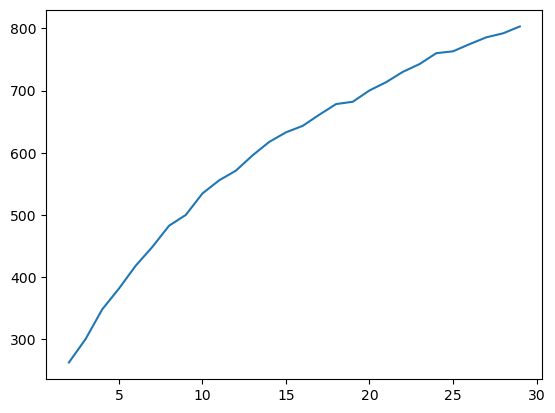

In [311]:
import matplotlib.pyplot as plt
plt.plot(range(2,30),err)

In [130]:
erre = []
for NO_OF_CLUSTERS in range(2,100):
    kmeans = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=42)
    new_doc_vect = vectorizer.transform([new_doc])

    # Apply the K-Means algorithm to the vectorized summaries
    cluster_labels = kmeans.fit_predict(vectorized_summaries)
    new_new_data['cluster']=cluster_labels

    sum=0
    for cnumber in range(NO_OF_CLUSTERS):
        indexx=new_new_data[new_new_data['cluster']==cnumber].index

        cluster_centroid = csr_matrix(kmeans.cluster_centers_[cnumber])
        diff = euclidean_distances(cluster_centroid, vectorized_summaries[indexx])
#         for i in indexx:
#             diff = cosine_similarity(cl)
        for val in diff[0]:
            sum+=val*val
    print("NO OF CLUSTERS",NO_OF_CLUSTERS)
    print("ERROR : ",sum)
    erre.append(sum)
        
        

NO OF CLUSTERS 2
ERROR :  8606.063750477653
NO OF CLUSTERS 3
ERROR :  8567.052729448767
NO OF CLUSTERS 4
ERROR :  8528.695455413626
NO OF CLUSTERS 5
ERROR :  8493.959942021966
NO OF CLUSTERS 6
ERROR :  8460.995476148002
NO OF CLUSTERS 7
ERROR :  8429.42819981429
NO OF CLUSTERS 8
ERROR :  8401.337537106307
NO OF CLUSTERS 9
ERROR :  8373.302364281475
NO OF CLUSTERS 10
ERROR :  8352.545080280983
NO OF CLUSTERS 11
ERROR :  8330.933615286725
NO OF CLUSTERS 12
ERROR :  8313.007430897496
NO OF CLUSTERS 13
ERROR :  8298.11005476044
NO OF CLUSTERS 14
ERROR :  8281.098757405167
NO OF CLUSTERS 15
ERROR :  8264.699368786978
NO OF CLUSTERS 16
ERROR :  8243.598314394592
NO OF CLUSTERS 17
ERROR :  8232.877967712255
NO OF CLUSTERS 18
ERROR :  8222.826033041887
NO OF CLUSTERS 19
ERROR :  8214.514041539436
NO OF CLUSTERS 20
ERROR :  8192.985238532943
NO OF CLUSTERS 21
ERROR :  8176.4317683330155
NO OF CLUSTERS 22
ERROR :  8183.459561671767
NO OF CLUSTERS 23
ERROR :  8159.042879996101
NO OF CLUSTERS 24
E

In [131]:
newe=[e/100 for e in erre]


Text(0, 0.5, 'Overall Error')

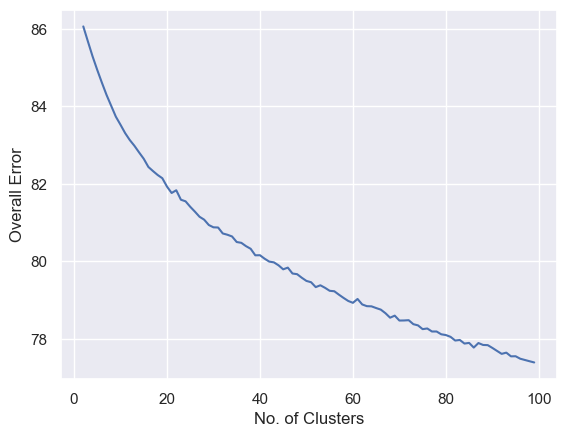

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
plt.plot(range(2,100),newe)
plt.xlabel("No. of Clusters")
plt.ylabel("Overall Error")


In [274]:
for NO_OF_CLUSTERS in range(2,20):
    kmeans = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=42)
    new_doc_vect = vectorizer.transform([new_doc])

    # Apply the K-Means algorithm to the vectorized summaries
    cluster_labels = kmeans.fit_predict(vectorized_summaries)
    new_new_data['cluster']=cluster_labels

    sum=0
    for cnumber in range(NO_OF_CLUSTERS):
        indexx=new_new_data[new_new_data['cluster']==cnumber].index

        cluster_centroid = csr_matrix(kmeans.cluster_centers_[cnumber])
        for i in indexx:
            diff = (cluster_centroid - vectorized_summaries[i]).data
            for val in diff:
                sum+=val*val
    print("NO OF CLUSTERS",NO_OF_CLUSTERS)
    print("ERROR : ",sum)
        
        

NO OF CLUSTERS 2
ERROR :  8602.555605317277
NO OF CLUSTERS 3
ERROR :  8561.36778814258
NO OF CLUSTERS 4
ERROR :  8525.573294743697
NO OF CLUSTERS 5
ERROR :  8490.886963669995
NO OF CLUSTERS 6
ERROR :  8458.367216042507
NO OF CLUSTERS 7
ERROR :  8424.628482239697
NO OF CLUSTERS 8
ERROR :  8394.637841738733


KeyboardInterrupt: 

In [192]:
kmeans.cluster_centers_[8]

array([0., 0., 0., ..., 0., 0., 0.])

In [176]:
kmeans.cluster_centers_[1]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.00032341])

In [147]:
new_new_data

,Case Number,Summary,PreProcessedSummary,cluster
0,1249923,An appeal by special leave against the judgme...,special leave punjab high dated may ferozepur ...,7
1,68170353,Drug and Magic Remedies (Objectionable Advert...,drug magic remedy objectionable advertisement ...,7
2,779491,Criminal Appeal No. 204 of the Calcutta High ...,criminal calcutta high special leave dated jun...,1
3,591481,"Petition Nos. 81, 62, 63 & 3 of 1959 was file...",no filed art constitution india petitioner all...,2
4,1034384,"Criminal Appeals Nos. 36-D, 37-D and 52-D of ...",criminal appeal no quashed punjab high punjab ...,7
...,...,...,...,...
8814,1057848,The appellant was working as Officiating Secr...,working officiating secretary respondent munic...,0
8815,550254,The appellants and their deceased father S. B...,appellant deceased father bhagat singh saluja ...,7
8816,1073551,The disputed land belonged originally to one ...,disputed land belonged originally one anwar al...,9
8817,998337,Jaimal was the owner of the suit properties ....,jaimal owner suit property died leaving behind...,0


In [216]:


# Get the indices of the documents belonging to each cluster
cluster_indices = [np.where(cluster_labels == i)[0] for i in range(NO_OF_CLUSTERS)]
# Loop over each cluster
for i, indices in enumerate(cluster_indices):
    # Get the documents belonging to the current cluster
    cluster_documents = [preprocessed_summaries[index] for index in indices]
    #cluster_documents = [summaries[index] for index in indices]

    
    # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
    vectorizer = TfidfVectorizer(stop_words=all_stop_words)
    tfidf_matrix = vectorizer.fit_transform(cluster_documents)
    
    # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
    word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    sorted_word_indices = np.argsort(word_scores)[::-1]
    
    # Print the top 10 words for the current cluster
    print(f"\nTop 10 words for Cluster {i}:")
    feature_names = np.array(vectorizer.get_feature_names_out())
    for j in range(10):
        print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")



Top 10 words for Cluster 0:
high (29.69)
dated (22.33)
delivered (18.12)
special (16.39)
leave (15.46)
two (13.36)
madras (11.90)
writ (11.29)
bombay (10.75)
respondent (10.43)

Top 10 words for Cluster 1:
singh (47.26)
section (44.70)
high (41.22)
convicted (33.40)
sentenced (31.95)
sentence (29.43)
imprisonment (28.82)
code (28.42)
conviction (27.73)
offence (27.71)

Top 10 words for Cluster 2:
tax (49.78)
high (40.31)
sale (38.43)
income (35.86)
year (32.47)
assessment (31.26)
company (28.06)
assessee (22.13)
officer (19.86)
respondent (18.20)

Top 10 words for Cluster 3:
suit (43.54)
high (39.56)
decree (38.31)
defendant (37.25)
plaintiff (32.81)
property (28.91)
dated (25.10)
respondent (22.57)
filed (21.21)
land (21.17)

Top 10 words for Cluster 4:
industrial (25.50)
tribunal (25.34)
dispute (20.82)
workman (20.64)
award (18.37)
leave (16.42)
special (16.08)
labour (15.12)
company (13.99)
respondent (13.60)

Top 10 words for Cluster 5:
election (23.73)
high (15.00)
respondent (1

In [44]:
vectorized_summaries

<8819x16864 sparse matrix of type '<class 'numpy.float64'>'
	with 200090 stored elements in Compressed Sparse Row format>

In [45]:
new_doc_vect

<1x16864 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [148]:
new_document='Appeal from the judgment and order dated October 7, 1953, in the Orissa High Court in O.J.C. No. 37 of  1952 . The relevant appeal was delivered by BHAGWATI  J.-This appeal arises out of a petition filed by the respondent in the High Court of Orissa against tenants of his private lands . The lands comprised in the present proceedings were declared to be the private properties of the respondent '

In [149]:
new_doc = "The landlord sued the tenant for not paying rent on time"


In [150]:
new_doc_preprocess = preprocess_summary(new_doc)
new_doc_preprocess

'landlord sued tenant paying rent time'

In [151]:
# vectorizer = TfidfVectorizer(stop_words="english")
new_document_vectorized = vectorizer.transform([new_doc_preprocess])
new_document_vectorized

<1x16864 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [152]:
# # vectorizer = TfidfVectorizer(stop_words="english")



kmeans.predict(new_document_vectorized)

array([9])

In [153]:
# data['cluster']=cluster_labels
# data['PreProSum']=preprocessed_summaries
# for sum in data[data['cluster']==1]['Summary']:
#     print(sum)
#     print('-----------------')

### ----------------------------------------------------------------------------

In [386]:
NO_OF_CLUSTERS=5

In [388]:
vectorised_data = [] #Vector Data Matrix
vectorizer = TfidfVectorizer()
maxL=0
for summary in preprocessed_summaries:
    new_document_vectorized = vectorizer.fit_transform([summary])
    new_document_vectorized = np.hstack((new_document_vectorized.toarray(), np.zeros((new_document_vectorized.shape[0], 52-new_document_vectorized.shape[1]))))
    vectorised_data.append(new_document_vectorized[0])


In [389]:
vectorised_data

[array([0.16222142, 0.16222142, 0.16222142, 0.16222142, 0.16222142,
        0.16222142, 0.16222142, 0.16222142, 0.16222142, 0.16222142,
        0.16222142, 0.16222142, 0.16222142, 0.16222142, 0.16222142,
        0.16222142, 0.16222142, 0.32444284, 0.16222142, 0.16222142,
        0.16222142, 0.16222142, 0.16222142, 0.16222142, 0.16222142,
        0.32444284, 0.16222142, 0.16222142, 0.16222142, 0.16222142,
        0.16222142, 0.16222142, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 array([0.19611614, 0.19611614, 0.19611614, 0.19611614, 0.39223227,
        0.19611614, 0.19611614, 0.19611614, 0.19611614, 0.19611614,
        0.19611614, 0.19611614, 0.19611614, 0.19611614, 0.19611614,
        0.19611614, 0.19611614, 0.19611614, 0.19611614, 0.19611614,
        0.1961

In [390]:
kmeans = KMeans(n_clusters=NO_OF_CLUSTERS, random_state=42)

# Apply the K-Means algorithm to the vectorized summaries
cluster_labels = kmeans.fit_predict(vectorised_data)
cluster_labels

C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


array([3, 1, 4, ..., 3, 4, 3])

In [431]:
# data['cluster']=cluster_labels
# data['PreProSum']=preprocessed_summaries
# for sum in data[data['cluster']==1]['PreProSum']:
#     print(sum)
#     print('-----------------')

In [371]:
new_document="high court reversed decree subordinate judge motihari dated march suit filed present appellant declaration title odd bighas ryotikasht land possession thereof defendant"


In [372]:
preprocess_summary_new_doc = preprocess_summary(new_document)
new_document_vectorized = vectorizer.fit_transform([preprocess_summary_new_doc])
new_document_vectorized = np.hstack((new_document_vectorized.toarray(), np.zeros((new_document_vectorized.shape[0], 52-new_document_vectorized.shape[1]))))

In [373]:
kmeans.predict(new_document_vectorized)

array([1])

In [351]:
new_document_vectorized.shape[1]

5000

### GET TOP words in each cluster

In [309]:
for i in range(2,100):
# Define the K-Means clustering algorithm
    kmeans = KMeans(n_clusters=i, random_state=42)

    # Apply the K-Means algorithm to the vectorized summaries
    cluster_labels = kmeans.fit_predict(vectorised_data)

    # Evaluate the clustering results using the silhouette score
    silhouette_avg = silhouette_score(vectorised_data, cluster_labels)
    print(f'Silhouette score: {silhouette_avg:.2f} | no of clusters : {i}')


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.21 | no of clusters : 2


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.19 | no of clusters : 3


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.17 | no of clusters : 4


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.15 | no of clusters : 5


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.14 | no of clusters : 6


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.13 | no of clusters : 7


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 8


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 9


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 10


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 11


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 12


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 13


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 14


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 15


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 16


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 17


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 18


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 19


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 20


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 21


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 22


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 23


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 24


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.12 | no of clusters : 25


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 26


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


Silhouette score: 0.11 | no of clusters : 27


C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsimh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Print the top key words for each cluster
n_top_keywords = 10
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer

In [ ]:
data['cluster']=cluster_labels
data['PreProSum']=preprocessed_summaries

In [ ]:
data

In [ ]:
data[data['cluster']==4]['Summary'][:10]

In [ ]:
for sum in data[data['cluster']==4]['PreProSum']:
    print(sum)
    print('-----------------')

In [ ]:
 import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string

# Define the vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english') + list(string.punctuation))

# Vectorize the documents
X = vectorizer.fit_transform(data)

# Cluster the documents
n_clusters = 5
km = KMeans(n_clusters=n_clusters, random_state=0)
km.fit(X)

# Get the cluster labels for each document
labels = km.labels_

# Get the text for each cluster
cluster_text = ['' for _ in range(n_clusters)]
for i, text in enumerate(data):
    cluster_text[labels[i]] += ' ' + text

# Clean the text and compute tf-idf scores
cleaned_text = [' '.join(word for word in text.lower().split() if word not in stopwords.words('english') and word not in string.punctuation) for text in cluster_text]
X_cluster = vectorizer.transform(cleaned_text)
tfidf_scores = np.asarray(X_cluster.mean(axis=0)).ravel()

# Print the top 10 keywords for each cluster
for i in range(n_clusters):
    start = i * vectorizer.get_feature_names()
    end = (i + 1) * vectorizer.get_feature_names()
    indices = tfidf_scores[start:end].argsort()[::-1][:10]
    keywords = [vectorizer.get_feature_names()[i] for i in indices]
    print(f'Cluster {i}: {keywords}')


In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Define the number of clusters
num_clusters = 5

# Create a K-Means clustering object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the K-Means object on the vectorized summaries to cluster them
cluster_labels = kmeans.fit_predict(vectorized_summaries)

# Get the indices of the documents belonging to each cluster
cluster_indices = [np.where(cluster_labels == i)[0] for i in range(num_clusters)]

# Loop over each cluster
for i, indices in enumerate(cluster_indices):
    # Get the documents belonging to the current cluster
    cluster_documents = [summaries[index] for index in indices]
    
    # Create a TF-IDF vectorizer and fit it on the documents belonging to the current cluster
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(cluster_documents)
    
    # Get the sum of the TF-IDF scores for each word across all the documents belonging to the current cluster
    word_scores = np.asarray(tfidf_matrix.sum(axis=0)).ravel()
    sorted_word_indices = np.argsort(word_scores)[::-1]
    
    # Print the top 10 words for the current cluster
    print(f"\nTop 10 words for Cluster {i+1}:")
    feature_names = np.array(vectorizer.get_feature_names())
    for j in range(10):
        print(f"{feature_names[sorted_word_indices[j]]} ({word_scores[sorted_word_indices[j]]:.2f})")


ISSUES : 
1) All getting into same cluster due to dim mismatch

## ----------------------------------- 

## -------------------------------------------------------------- WORD2VEC 

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize


In [ ]:
documents = summaries
processed_docs = [word_tokenize(doc.lower()) for doc in documents]


In [ ]:
model = Word2Vec(processed_docs, window=5, min_count=1, workers=4)


In [ ]:
# Get the vector representation of a word
vector = model.wv['word']

# Get the vector representation of a document summary
doc_vector = model.infer_vector(word_tokenize('Document summary'))


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

# Create a list of tagged documents
tagged_docs = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[i]) for i, doc in enumerate(summaries)]

# Train the Doc2Vec model
model = Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=1, workers=4)

# Infer a vector representation for a new document
new_doc_vector = model.infer_vector(word_tokenize('Document summary'))

# Find similar documents to the new document
similar_docs = model.docvecs.most_similar([new_doc_vector])


In [ ]:
similar_docs


In [ ]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
def preprocess_text(text):
    # your preprocessing code here
    return text


In [ ]:
# model = Word2Vec.load('path/to/word2vec/model')

In [ ]:
def get_document_vector(document):
    # preprocess the document
    preprocessed_doc = preprocess_text(document)
    # split the preprocessed document into words
    words = preprocessed_doc.split()
    # remove words that are not in the Word2Vec model's vocabulary
    words = [word for word in words if word in model.wv.vocab]
    # calculate the average of all word vectors in the document
    if len(words) > 0:
        vector = np.mean(model[words], axis=0)
    else:
        vector = np.zeros((model.vector_size,))
    return vector


In [ ]:
def perform_clustering(documents, num_clusters):
    # get the vector representation of each document
    document_vectors = [get_document_vector(doc) for doc in documents]
    # perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(document_vectors)
    # return the cluster labels for each document
    return kmeans.labels_


In [ ]:
documents = summaries
num_clusters = 2
cluster_labels = perform_clustering(documents, num_clusters)


In [ ]:
from gensim.models import Word2Vec,Doc2Vec
from nltk.tokenize import word_tokenize


In [ ]:
documents = summaries
processed_docs = [word_tokenize(doc.lower()) for doc in documents]


In [ ]:
model = Word2Vec(processed_docs, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
# Get the vector representation of a word
vector = model.wv['word']

# Get the vector representation of a document summary
doc_vector = model.infer_vector(word_tokenize('Document summary'))


In [ ]:
# Find similar words to 'word'
similar_words = model.wv.most_similar('word')

# Find similar document summaries to 'Document summary 1'
similar_docs = model.docvecs.most_similar([model.infer_vector(word_tokenize('Document summary 1.'))])


In [ ]:
!word2vec --version